In [2]:
import numpy as np
import pandas as pd



In [3]:
#question 1
a = pd.Series(np.array([(x**2 - 1) for x in np.arange(0,51,2)]) , index=np.arange(0,51,2))
a[np.array([i % 3 == 0 for i in a.index])] = 0
a

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int32

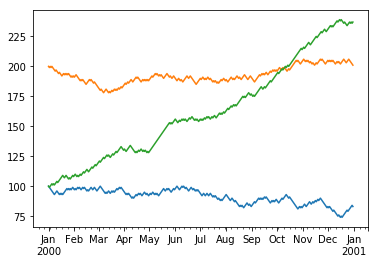

In [47]:
#question 2
def function(p,d=100):   
        bernoulli=np.random.binomial(1,p,366)
        for i in range(len(bernoulli)):
            if bernoulli[i]==0:
                bernoulli[i]=-1
        s=pd.Series(bernoulli,index=pd.date_range("01/01/2000", "12/31/2000", freq="D"))
        s[0]=d 
        A = s.cumsum()
        for i in range(len(A)):
            if A[i]<=0:
                A[i]=0
        A.plot()

function(0.5,100)
function(0.5,200)
function(0.7,100)

In [48]:
#solution 3
import pandas as pd

name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

studentInfo[(studentInfo['Age']>19) & (studentInfo['Sex']=="M")][['ID','Name']]
pd.merge(studentInfo, otherInfo, on='ID', how='outer')[['ID','Age','GPA']]


,ID,Age,GPA
0,0,20,3.8
1,1,21,3.5
2,2,18,3.0
3,3,22,3.9
4,4,19,2.8
5,5,20,2.9
6,6,20,3.8
7,7,19,3.4
8,8,20,3.7


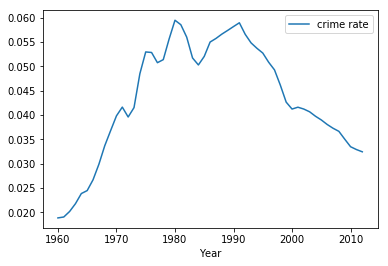

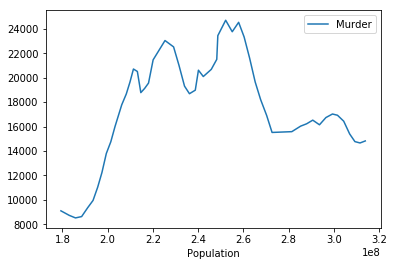

In [50]:
#problem 5
import pandas as pd
import numpy as np
A= pd.read_csv('crime_data.txt',index_col=0, skiprows=1)
A['crime rate']=A['Total']/A['Population']
A.plot(y='crime rate')
A.sort_values('crime rate', ascending=False).head()
avgtotal = np.mean(A['Total'])
type(avgtotal)
avgburglary=np.mean(A['Burglary'])
A[(A['Total']>avgtotal)&(A['Burglary']<avgburglary)]
A.plot(x='Population', y='Murder')
B=A.loc['1980':'1989']
B.to_csv("smaller_dataset.csv")

In [51]:
A=pd.read_csv('titanic.csv', header=0)
B=A.drop(['Sibsp', 'Parch', 'Cabin', 'Boat', 'Body', 'home.dest'], axis=1)
B=B.dropna(subset=['Survived'])
avgage=np.mean(B['Age'])
B['Age']=B['Age'].fillna(avgage)
B.to_csv('titanic_clean.csv')
survivors= np.sum(B['Survived'])
print('Number of survivors are: ', survivors)
percent_survivors=survivors/int(len(B.index))
print('Percentage of survivors are: ', percent_survivors*100)
ticketprice= np.sum(B['Fare'])/int(len(B.index))
print('Average ticket price is: ', ticketprice)
ticketmax= np.max(B['Fare'])
print('The most expensive ticket cost: ', ticketmax)
oldestsurvivor = np.max(B[B['Survived']==1]['Age'])
print('oldest survivor is: ', oldestsurvivor)
youngestsurvivor = np.min(B[B['Survived']==1]['Age'])
print('youngest survivor is: ', youngestsurvivor)
olddeath=np.max(B[B['Survived']==0]['Age'])
print('Oldest death age: ', olddeath)
youngdeath=np.min(B[B['Survived']==0]['Age'])
print('Youngest death age: ', youngdeath)

Number of survivors are:  500.0
Percentage of survivors are:  38.19709702062643
Average ticket price is:  33.270043468296414
The most expensive ticket cost:  512.3292
oldest survivor is:  80.0
youngest survivor is:  0.1667
Oldest death age:  74.0
Youngest death age:  0.3333
